In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

Generate some fake data.

Text(0, 0.5, '$Y$')

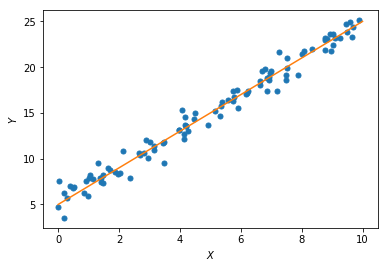

In [10]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size = n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)# We will also add some random noise.

plt.figure()
plt.plot(x,y,"o", ms =5)

xx = np.array([0,10])
plt.plot(xx, beta_0 + beta_1 * xx)

plt.xlabel("$X$")
plt.ylabel("$Y$")

In [11]:
np.mean(x)

4.8587792760014565

To predict a quantitative response Y on the basis of a single predictor variable X. It assumes the following relationship between the random variables X and Y.
Our random variable, which is capital Y, is going to be given to us by some parameter**beta 0** plus some other parameter**beta 1**
times a random variable X plus epsilon, which is some error term.

$Y =\beta_0 +  \beta_1 X + \epsilon $ .

Once we have used training data to produce estimates, **beta 0 hat** and **beta 1 hat**, for the model coefficients,
we can predict future values of Y.

$\hat{y} =\hat{\beta_0} +  \hat{\beta_1} x $

**y hat** indicates a prediction, or a specific value, of the random variable Y
on the basis of a specific value where X (the uppercase X)
is equal to a lowercase **x**.
Notice the hats on top of the betas.
They indicate that these are parameter estimates,meaning that their parameter values that have been estimated using data.

The most common approach to estimating the model parameters involves minimizing the least squares criterion.

$ei = yi - \hat{yi}$

$RSS =e0 + e1 + ... + en$

The least squares estimates of **beta 0** and **beta 1**are those values that minimize the RSS criterion.


In [12]:
def compute_rss(y_estimate, y):
    return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x

compute_rss(estimate_y(x, beta_0, beta_1), y) 

81.540007425512

It's useful to simply try out some of the values for the parameters over a grid of points to understand
the underlying principles.

In the following, we're going to assume that we know the true value of beta 0,and our goal is to estimate the value of beta 1, the slope of the line,
from data.

In [27]:
rss = []
slopes = np.arange(-10,15,0.01)
for slope in slopes:
    e = np.sum((y - (beta_0 + slope*x)) ** 2)
    rss.append(e)
rss

[465163.6265980302,
 464389.08137639664,
 463615.18165403913,
 462841.9274309581,
 462069.3187071535,
 461297.35548262496,
 460526.03775737283,
 459755.36553139694,
 458985.33880469744,
 458215.9575772741,
 457447.22184912727,
 456679.1316202565,
 455911.68689066224,
 455144.8876603442,
 454378.73392930237,
 453613.22569753695,
 452848.36296504777,
 452084.145731835,
 451320.5739978984,
 450557.64776323806,
 449795.36702785414,
 449033.7317917465,
 448272.7420549152,
 447512.39781736,
 446752.69907908136,
 445993.6458400789,
 445235.23810035264,
 444477.47585990286,
 443720.35911872925,
 442963.8878768319,
 442208.062134211,
 441452.8818908663,
 440698.347146798,
 439944.45790200593,
 439191.21415649017,
 438438.6159102507,
 437686.66316328745,
 436935.3559156006,
 436184.6941671901,
 435434.67791805574,
 434685.3071681979,
 433936.5819176162,
 433188.50216631085,
 432441.0679142817,
 431694.2791615289,
 430948.1359080525,
 430202.6381538523,
 429457.7858989284,
 428713.5791432808,
 42

In [28]:
ind_min = np.argmin(rss)
print ("Min error",rss[ind_min])
print ("Estimate  for the slope",slopes[ind_min])

Min error 81.54000742551887
Estimate  for the slope 1.9999999999997442


Text(0, 0.5, 'RSS')

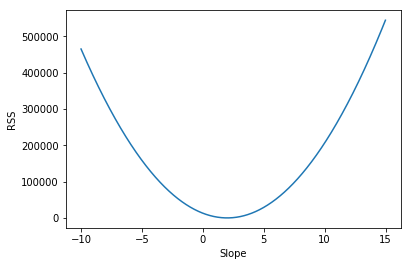

In [29]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")

In [30]:
import statsmodels.api as sm
mod = sm.OLS(y,x)
est = mod.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2974.
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           1.14e-75
Time:                        07:56:42   Log-Likelihood:                -246.89
No. Observations:                 100   AIC:                             495.8
Df Residuals:                      99   BIC:                             498.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7569      0.051     54.538      0.000       2.657       2.857
==============================================================================
Omnibus:                        7.901   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.386
Skew:                           0.139   Prob(JB):                        0.184
Kurtosis:                       2.143   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We've actually fitted a slightly different model, a model that has a slope, but no intercept,
meaning that there is no constant term in the model.
This means that the line is forced to go through 0, which is why the slope is artificially large.


In [31]:
X = sm.add_constant(x)
mod = sm.OLS(y,X)
est = mod.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           7.47e-82
Time:                        08:00:35   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.000       4.891       5.583
x1             1.9685      0.031     64.151      0.000       1.908       2.029
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.753
Skew:                          -0.189   Prob(JB):                        0.416
Kurtosis:                       3.528   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multiple Linear Regression the goal is to predict a quantitative or a scalar valued
response, Y, on the basis of several predictor variables.
And the model takes the following form.

$\hat{y} =\hat{\beta_0} +  \hat{\beta_1} x1 +  \hat{\beta_2} x2 $


In [34]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1*x_1 + beta_2*x_2 + ss.norm.rvs(loc = 0, scale = 1,size = n)
X = np.stack([x_1, x_2], axis = 1)



Text(0.5, 0, '$y$')

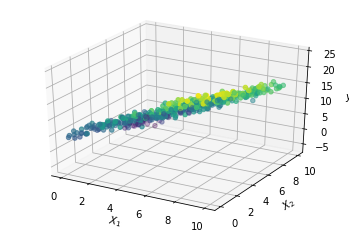

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1] ,y,c=y)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$y$")

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)

lm.fit(X, y)

print ("beta 0: ", lm.intercept_)
print ("beta 1: ", lm.coef_[0])
print ("beta 2: ", lm.coef_[1])

beta 0:  5.154077763777246
beta 1:  1.9999378989891408
beta 2:  -1.020264486993335


In [42]:
X_0 = np.array([2,4])
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

The model takes the input values X. It generates a prediction yhat, produced by the model.
And it compares the y hat with the true outcome values y in the training set.

In [43]:
lm.score(X,y)

0.9798997316600129

To evaluate the performance of a **regression model**, we need to somehow quantify how well the predictions of the model
agree with the observed data. In the regression setting, the most commonly used measure
is the **mean squared error MSE**.

To evaluate how well a **classifier** performs,we compute the training **error rate**, which is the proportion of errors the classifier makes when applied to training data.
Analogously to the regression setting, we also have test error rate, which is the proportion of errors or misclassifications the classifier makes when applied to test data.


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1)

lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)
lm.score(X_test,y_test)

/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9796591085044709